In [1]:
#This script is to practice linear regression. 
from src.quandle_data_sources import QuandlDataSources, Datahandler
from datetime import date
import pandas as pd


In [93]:
# Prepare the data set

series = [
    QuandlDataSources.Equities.appl,
    QuandlDataSources.Currencies.canusd,
    QuandlDataSources.Currencies.cnyusd,
    QuandlDataSources.Currencies.usdaud,
    QuandlDataSources.Currencies.usdeur,
    QuandlDataSources.Currencies.usdgbp,
    QuandlDataSources.Currencies.jpyusd,
]
df = Datahandler.get(series, start_date=date(2010, 1, 1), end_date=date.today())
df.columns = pd.MultiIndex.from_tuples([tuple(x.strip() for x in name.split('-')) for name in df.columns])

df_raw = pd.concat([df.loc[:, [(QuandlDataSources.Equities.appl, 'Adj_Close')]], df.iloc[:, -6:]], axis=1)
df_raw.columns = df_raw.columns.droplevel(1)

df_data = df_raw.pct_change().dropna()*100.0

df_data_monthly = df_raw.ffill().resample('M').last().pct_change().dropna()*100.0
print(df_data.shape)

(2301, 7)


In [94]:
# Standard regression

from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
# X = df_data[QuandlDataSources.Currencies.usdeur].to_frame().values
# Y = df_data[QuandlDataSources.Equities.appl].values
X = df_data_monthly[QuandlDataSources.Currencies.usdeur].to_frame().values
Y = df_data_monthly[QuandlDataSources.Equities.appl].values
reg.fit(X, Y)
Y_predict = reg.predict(X)
print(reg.coef_)
r_squared = r2_score(Y, Y_predict)
print("R squared is: {}".format(r_squared))

[0.17982989]
R squared is: 0.004116834097651623


(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 11 Text yticklabel objects>)

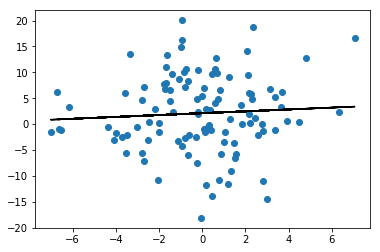

In [95]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, Y_predict, color='black')
plt.xticks()
plt.yticks()

In [96]:
# Multilinear model:
multi_reg = linear_model.LinearRegression()
# X = df_data.iloc[:, 1:].values
# Y = df_data[QuandlDataSources.Equities.appl].values
X = df_data_monthly.iloc[:, 1:].values
Y = df_data_monthly[QuandlDataSources.Equities.appl].values
multi_reg.fit(X, Y)
Y_predict = multi_reg.predict(X)
print(multi_reg.coef_)
r_squared = r2_score(Y, Y_predict)
print("R squared is: {}".format(r_squared))

[-0.60853696  0.10355509  0.40326055 -0.5957586   0.10355509  0.28792011]
R squared is: 0.08831237621720223


(array([-4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 7 Text yticklabel objects>)

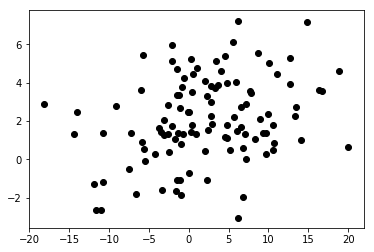

In [97]:

plt.scatter(Y, Y_predict, color='black')
plt.xticks()
plt.yticks()